In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
dfs = []

sec_id = "vtbr"
date_from = "2020-01-01"
date_to = "2025-01-01"
url = f"https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{sec_id}/candles.html?from={date_from}&till={date_to}"

retrieved = 0
while True:
    df, cursor = pd.read_html(url + f"&start={retrieved}")
    dfs.append(df)
    retrieved += cursor.at[0, "PAGESIZE (int64)"]
    total = cursor.at[0, "TOTAL (int64)"]
    if retrieved >= total:
        break

df = pd.concat(dfs, axis=0, ignore_index=True)
df.drop(labels=["BOARDID (string:12)", "SHORTNAME (string:189)", "SECID (string:36)", "CURRENCYID (string:9)", "WAVAL (double)", "TRADINGSESSION (int32)"], axis=1, inplace=True)
df["TRADEDATE (date:10)"] = pd.to_datetime(df["TRADEDATE (date:10)"])
df = df.set_index("TRADEDATE (date:10)")

In [86]:
df

,NUMTRADES (double),VALUE (double),OPEN (double),LOW (double),HIGH (double),LEGALCLOSEPRICE (double),WAPRICE (double),CLOSE (double),VOLUME (double),MARKETPRICE2 (double),MARKETPRICE3 (double),ADMITTEDQUOTE (double),MP2VALTRD (double),MARKETPRICE3TRADESVALUE (double),ADMITTEDVALUE (double),TRENDCLSPR (double)
TRADEDATE (date:10),,,,,,,,,,,,,,,,
2020-01-03,14685,5.495593e+08,0.046145,0.045995,0.046340,0.046240,0.046145,0.046240,11909550000,0.046145,0.046145,0.046240,5.495593e+08,5.495593e+08,5.495593e+08,0.74
2020-01-06,10787,3.688958e+08,0.046110,0.045930,0.046195,0.046110,0.046010,0.046110,8017580000,0.046010,0.046010,0.046110,3.688958e+08,3.688958e+08,3.688958e+08,-0.28
2020-01-08,23097,1.347597e+09,0.046210,0.046200,0.047000,0.046525,0.046760,0.046525,28820270000,0.046760,0.046760,0.046525,1.347597e+09,1.347597e+09,1.347597e+09,0.90
2020-01-09,26309,1.387380e+09,0.046830,0.046575,0.047300,0.047075,0.047010,0.047075,29512690000,0.047010,0.047010,0.047075,1.387380e+09,1.387380e+09,1.387380e+09,1.18
2020-01-10,24453,1.422514e+09,0.047150,0.047005,0.047890,0.047600,0.047545,0.047600,29926040000,0.047535,0.047535,0.047600,1.422514e+09,1.422514e+09,1.422514e+09,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,158740,4.046000e+09,73.730000,73.030000,76.850000,75.810000,74.190000,76.530000,53776399,75.070000,75.070000,NaN,3.486303e+09,3.486303e+09,NaN,3.57
2024-12-26,175585,3.181527e+09,76.610000,75.650000,77.670000,76.990000,76.700000,75.740000,41480719,76.780000,76.780000,NaN,2.600431e+09,2.600431e+09,NaN,-1.03
2024-12-27,61216,1.748148e+09,75.970000,75.520000,76.990000,76.190000,76.390000,76.490000,22885289,76.380000,76.380000,NaN,1.583889e+09,1.583889e+09,NaN,0.99


In [87]:
df.corr()

,NUMTRADES (double),VALUE (double),OPEN (double),LOW (double),HIGH (double),LEGALCLOSEPRICE (double),WAPRICE (double),CLOSE (double),VOLUME (double),MARKETPRICE2 (double),MARKETPRICE3 (double),ADMITTEDQUOTE (double),MP2VALTRD (double),MARKETPRICE3TRADESVALUE (double),ADMITTEDVALUE (double),TRENDCLSPR (double)
NUMTRADES (double),1.000000,0.889094,0.259027,0.256368,0.259972,0.260990,0.258376,0.257483,0.704644,0.260581,0.261606,0.189003,0.684507,0.856330,0.562292,-0.089247
VALUE (double),0.889094,1.000000,0.076999,0.075344,0.077943,0.081712,0.077050,0.076429,0.826559,0.080313,0.081990,0.461955,0.807709,0.982953,0.682795,0.018677
OPEN (double),0.259027,0.076999,1.000000,0.999876,0.999907,0.999786,0.999900,0.999723,-0.283427,0.999917,0.999917,0.997623,0.061486,0.061486,0.461762,-0.017440
LOW (double),0.256368,0.075344,0.999876,1.000000,0.999864,0.999914,0.999960,0.999887,-0.283430,0.999951,0.999951,0.998963,0.059939,0.059939,0.432100,-0.014177
HIGH (double),0.259972,0.077943,0.999907,0.999864,1.000000,0.999901,0.999959,0.999877,-0.283459,0.999958,0.999958,0.998429,0.062320,0.062320,0.482142,-0.014530
LEGALCLOSEPRICE (double),0.260990,0.081712,0.999786,0.999914,0.999901,1.000000,0.999960,0.999952,-0.276482,0.999946,0.999946,1.000000,0.043668,0.066510,0.286551,-0.012334
WAPRICE (double),0.258376,0.077050,0.999900,0.999960,0.999959,0.999960,1.000000,0.999927,-0.282802,0.999994,0.999994,0.999667,0.061177,0.061556,0.457254,-0.013943
CLOSE (double),0.257483,0.076429,0.999723,0.999887,0.999877,0.999952,0.999927,1.000000,-0.283452,0.999892,0.999892,0.999831,0.060863,0.060863,0.457302,-0.010952
VOLUME (double),0.704644,0.826559,-0.283427,-0.283430,-0.283459,-0.276482,-0.282802,-0.283452,1.000000,-0.278653,-0.276467,0.132352,0.667468,0.809858,0.596193,0.036882
MARKETPRICE2 (double),0.260581,0.080313,0.999917,0.999951,0.999958,0.999946,0.999994,0.999892,-0.278653,1.000000,1.000000,0.999278,0.042203,0.065004,0.296034,-0.014552


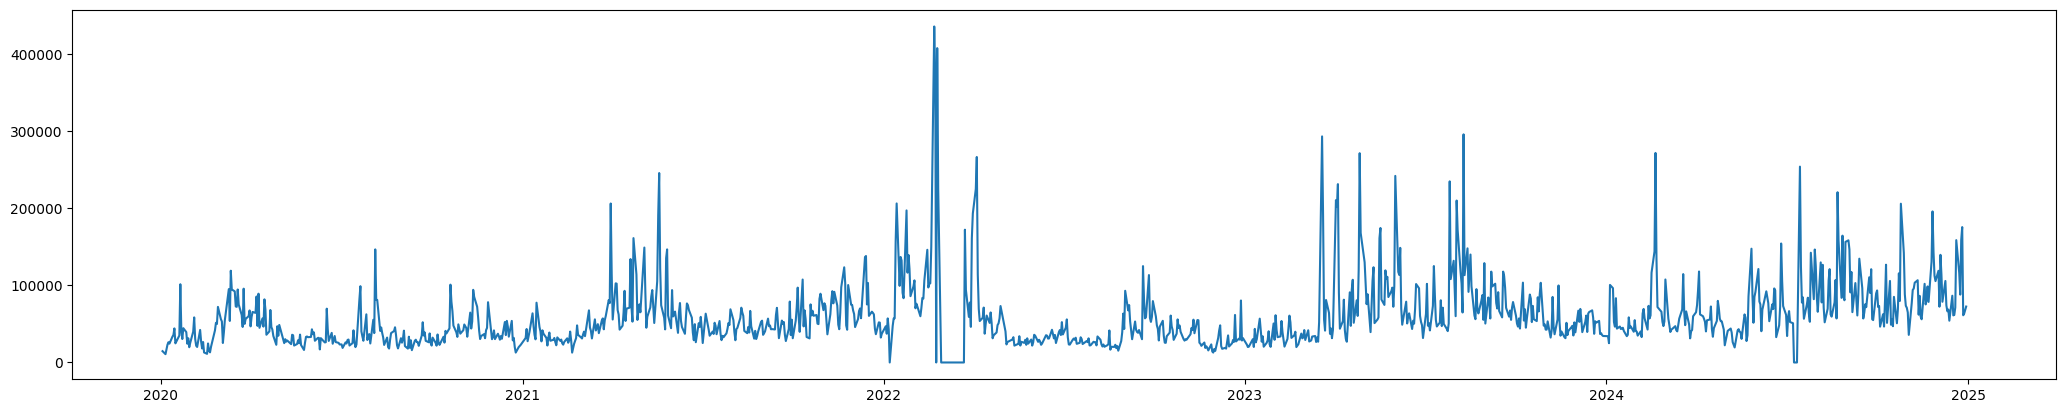

In [88]:
plt.figure(figsize=(25.6, 4.8))
plt.plot(df.index, df["NUMTRADES (double)"])
plt.show()

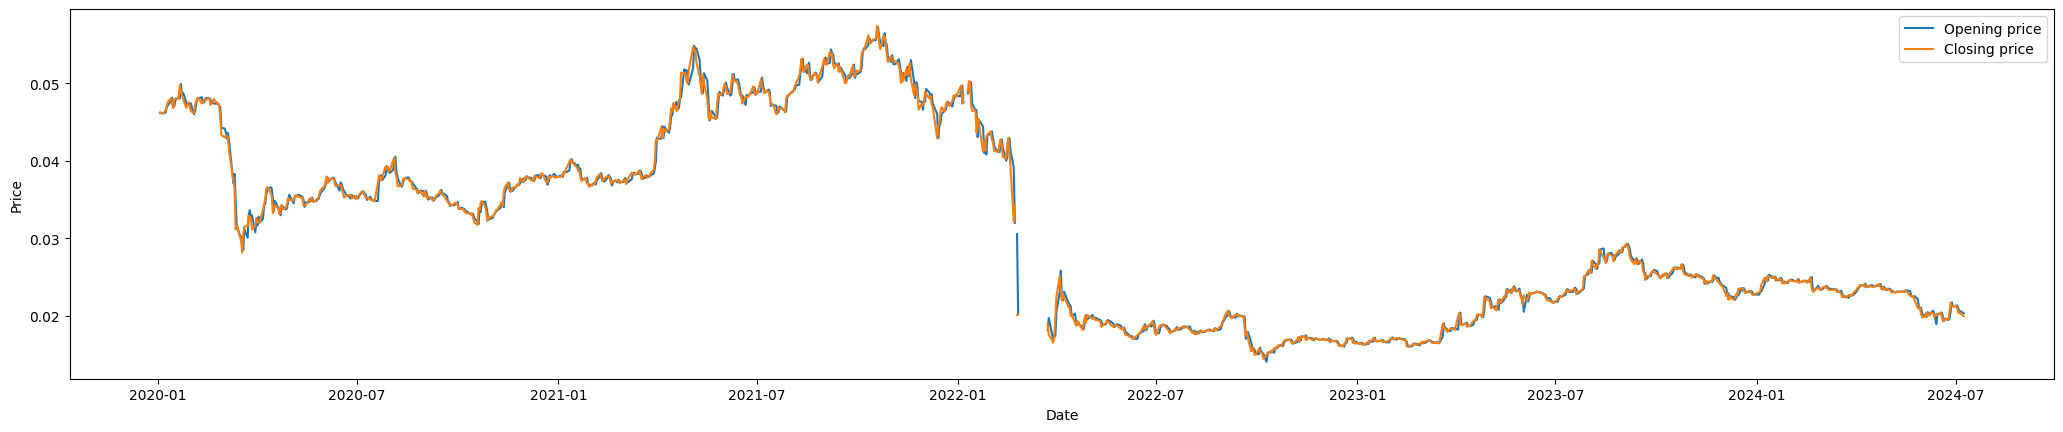

In [89]:
df_before_split = df[:-126]
plt.figure(figsize=(25.6, 4.8))
plt.plot(df_before_split.index, df_before_split["OPEN (double)"], label="Opening price")
plt.plot(df_before_split.index, df_before_split["CLOSE (double)"], label="Closing price")
#plt.plot(df_before_split.index, df_before_split["HIGH (double)"], label="Highest price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

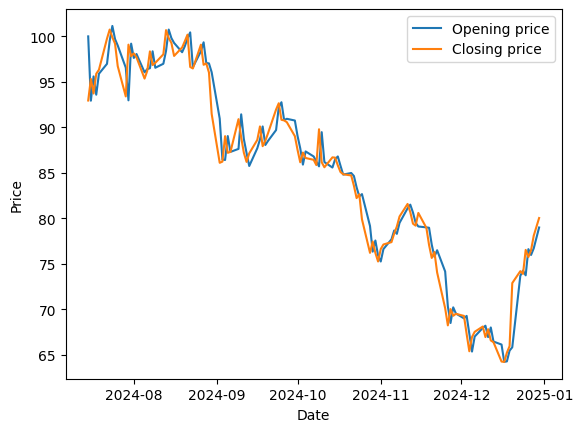

In [69]:
df_after_split = df[-122:]
plt.plot(df_after_split.index, df_after_split["OPEN (double)"], label="Opening price")
plt.plot(df_after_split.index, df_after_split["CLOSE (double)"], label="Closing price")
#plt.plot(df_after_split.index, df_after_split["HIGH (double)"], label="Highest price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

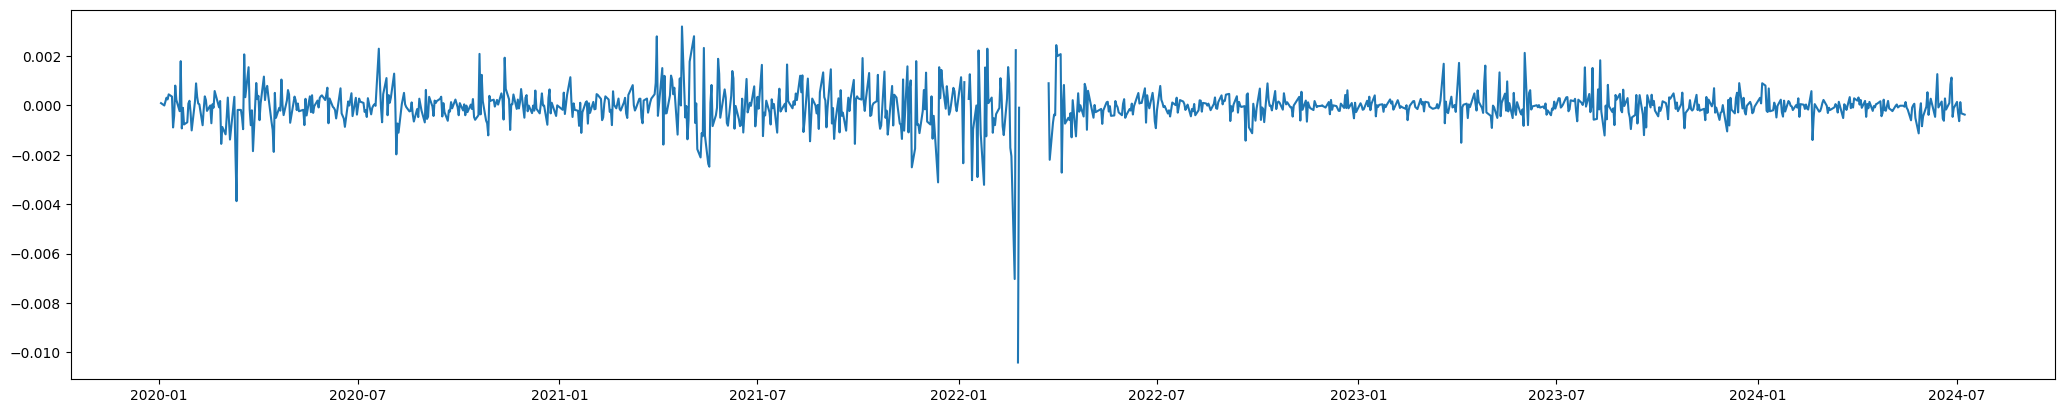

In [73]:
close_open_delta = df["CLOSE (double)"] - df["OPEN (double)"]
delta_before_split = close_open_delta[:-126]
delta_after_split = close_open_delta[-122:]
plt.figure(figsize=(25.6, 4.8))
plt.plot(delta_before_split.index, delta_before_split)
plt.show()

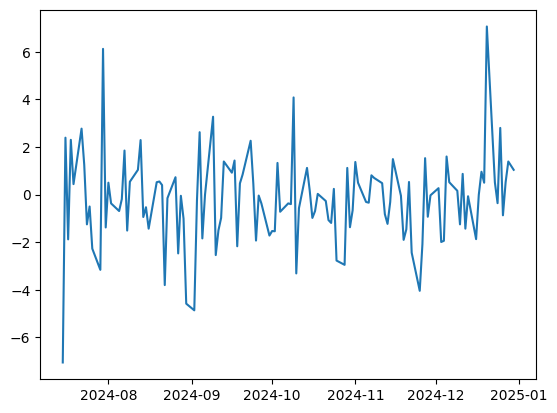

In [76]:
plt.plot(delta_after_split.index, delta_after_split)
plt.show()